# Artificial Neural Network

In [1]:
# Importing the relevant packages
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras import layers
from keras.preprocessing.image import load_img, img_to_array
import cv2
import s3fs
from PIL import Image

Using TensorFlow backend.


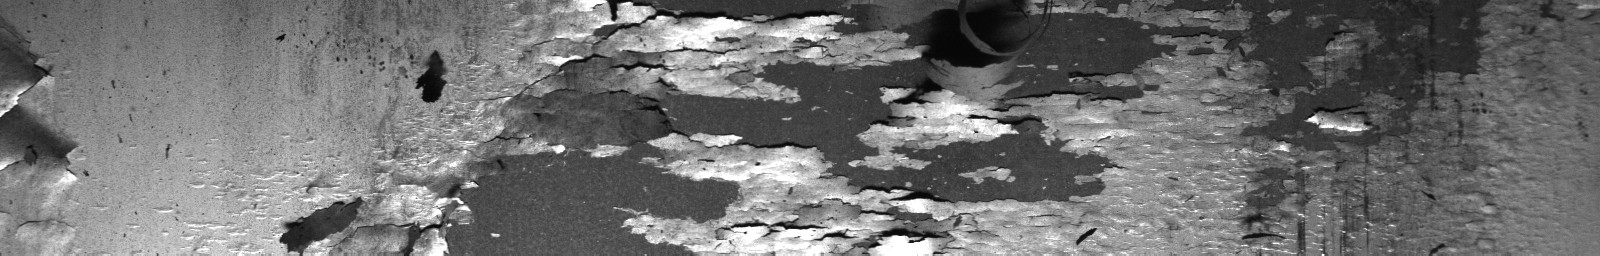

In [2]:
# Instancing an S3 FileSystem object
fs = s3fs.S3FileSystem()

# Making a list holding a filepath for every image in our training set 
path_list = fs.ls('s3://steel-training-dataset/training_images/train_images')

# Sanity check and displaying a training image
s3_1 = fs.open('s3://' + path_list[90])
image = load_img(s3_1, color_mode='grayscale')
image

In [3]:
# Converting our sample image to an array 
array = img_to_array(image)

array.shape

(256, 1600, 1)

In [4]:
# Filepath into the s3 bucket for our csv file
csv_filepath = fs.open('s3://steel-training-dataset/train.csv')

# Converting the csv to a dataframe
label_df = pd.read_csv(csv_filepath) 
label_df.head()

,ImageId,ClassId,EncodedPixels
0,0002cc93b.jpg,1,29102 12 29346 24 29602 24 29858 24 30114 24 3...
1,0007a71bf.jpg,3,18661 28 18863 82 19091 110 19347 110 19603 11...
2,000a4bcdd.jpg,1,37607 3 37858 8 38108 14 38359 20 38610 25 388...
3,000f6bf48.jpg,4,131973 1 132228 4 132483 6 132738 8 132993 11 ...
4,0014fce06.jpg,3,229501 11 229741 33 229981 55 230221 77 230468...


In [5]:
# Making a list of all of our jpg filenames
filenames = [i.split('/')[-1] for i in path_list]

# Making a list of zeroes as the default label 
zeroes  = [0 for x in range(len(filenames))]

# Making a dictionary to hold our class labels for each image 
label_dict = dict(zip(filenames, zeroes))

# Examining the first five rows
for i in range(5):
    index = list(label_dict.keys())[i]
    print(index, label_dict[index])

0002cc93b.jpg 0
00031f466.jpg 0
000418bfc.jpg 0
000789191.jpg 0
0007a71bf.jpg 0


In [33]:
# this for loop iterates through the label dataframe and records a label for each jpg into our dictionary
for i in list(label_df.ImageId):
    label_dict[i] = list(label_df.loc[label_df['ImageId'] == i]['ClassId'])[0]

# Again examining the first five rows, but this time after getting the true labels 
for i in range(5):
    index = list(label_dict.keys())[i]
    print(index, label_dict[index])

0002cc93b.jpg 1
00031f466.jpg 0
000418bfc.jpg 0
000789191.jpg 0
0007a71bf.jpg 3
